In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
%matplotlib inline
import numpy as pn

import pyoz as oz

In [2]:
def dpd_func(r, a):
    cutoff = np.abs(r - 1.0).argmin()
    dpd = np.zeros_like(r)
    dpd[:cutoff] = 0.5 * a * (1 - r[:cutoff])**2
    return dpd

dpd_binary = oz.System()
r = dpd_binary.r

dpd_binary.set_interaction(0, 0, dpd_func(r, a=15))
dpd_binary.set_interaction(0, 1, dpd_func(r, a=17))
dpd_binary.set_interaction(1, 1, dpd_func(r, a=15))

U_r = dpd_binary.U_r

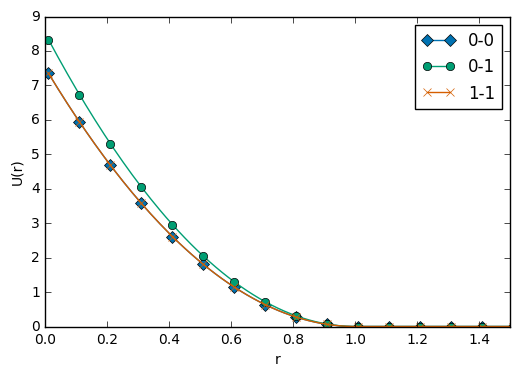

In [3]:
plt.plot(r, U_r[0, 0], marker='D', markevery=10, label='0-0')
plt.plot(r, U_r[0, 1], marker='o', markevery=10, label='0-1')
plt.plot(r, U_r[1, 1], marker='x', markevery=10, label='1-1')
plt.xlabel('r')
plt.ylabel('U(r)')
plt.xlim(0, 1.5)
plt.legend()

In [4]:
g_r, c_r, e_r, S_k = dpd_binary.solve(rhos=[1, 2], closure_name='hnc')

[INFO][2016-10-03 12:17:23,029] Converged in 2.09s after 48 iterations


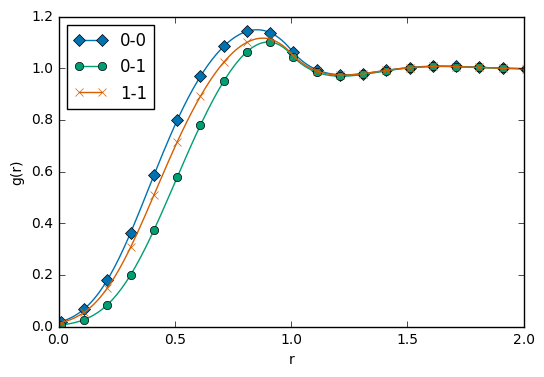

In [5]:
plt.plot(r, g_r[0, 0], marker='D', markevery=10, label='0-0')
plt.plot(r, g_r[0, 1], marker='o', markevery=10, label='0-1')
plt.plot(r, g_r[1, 1], marker='x', markevery=10, label='1-1')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.xlim(0, 2)
plt.legend(loc='best')